In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp

In [2]:
df = pd.read_csv('/Users/kathanbhavsar/Desktop/Python,DS,ML/08-Linear-Regression-Models/Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Text(0.5, 1.0, 'Newspaper spend')

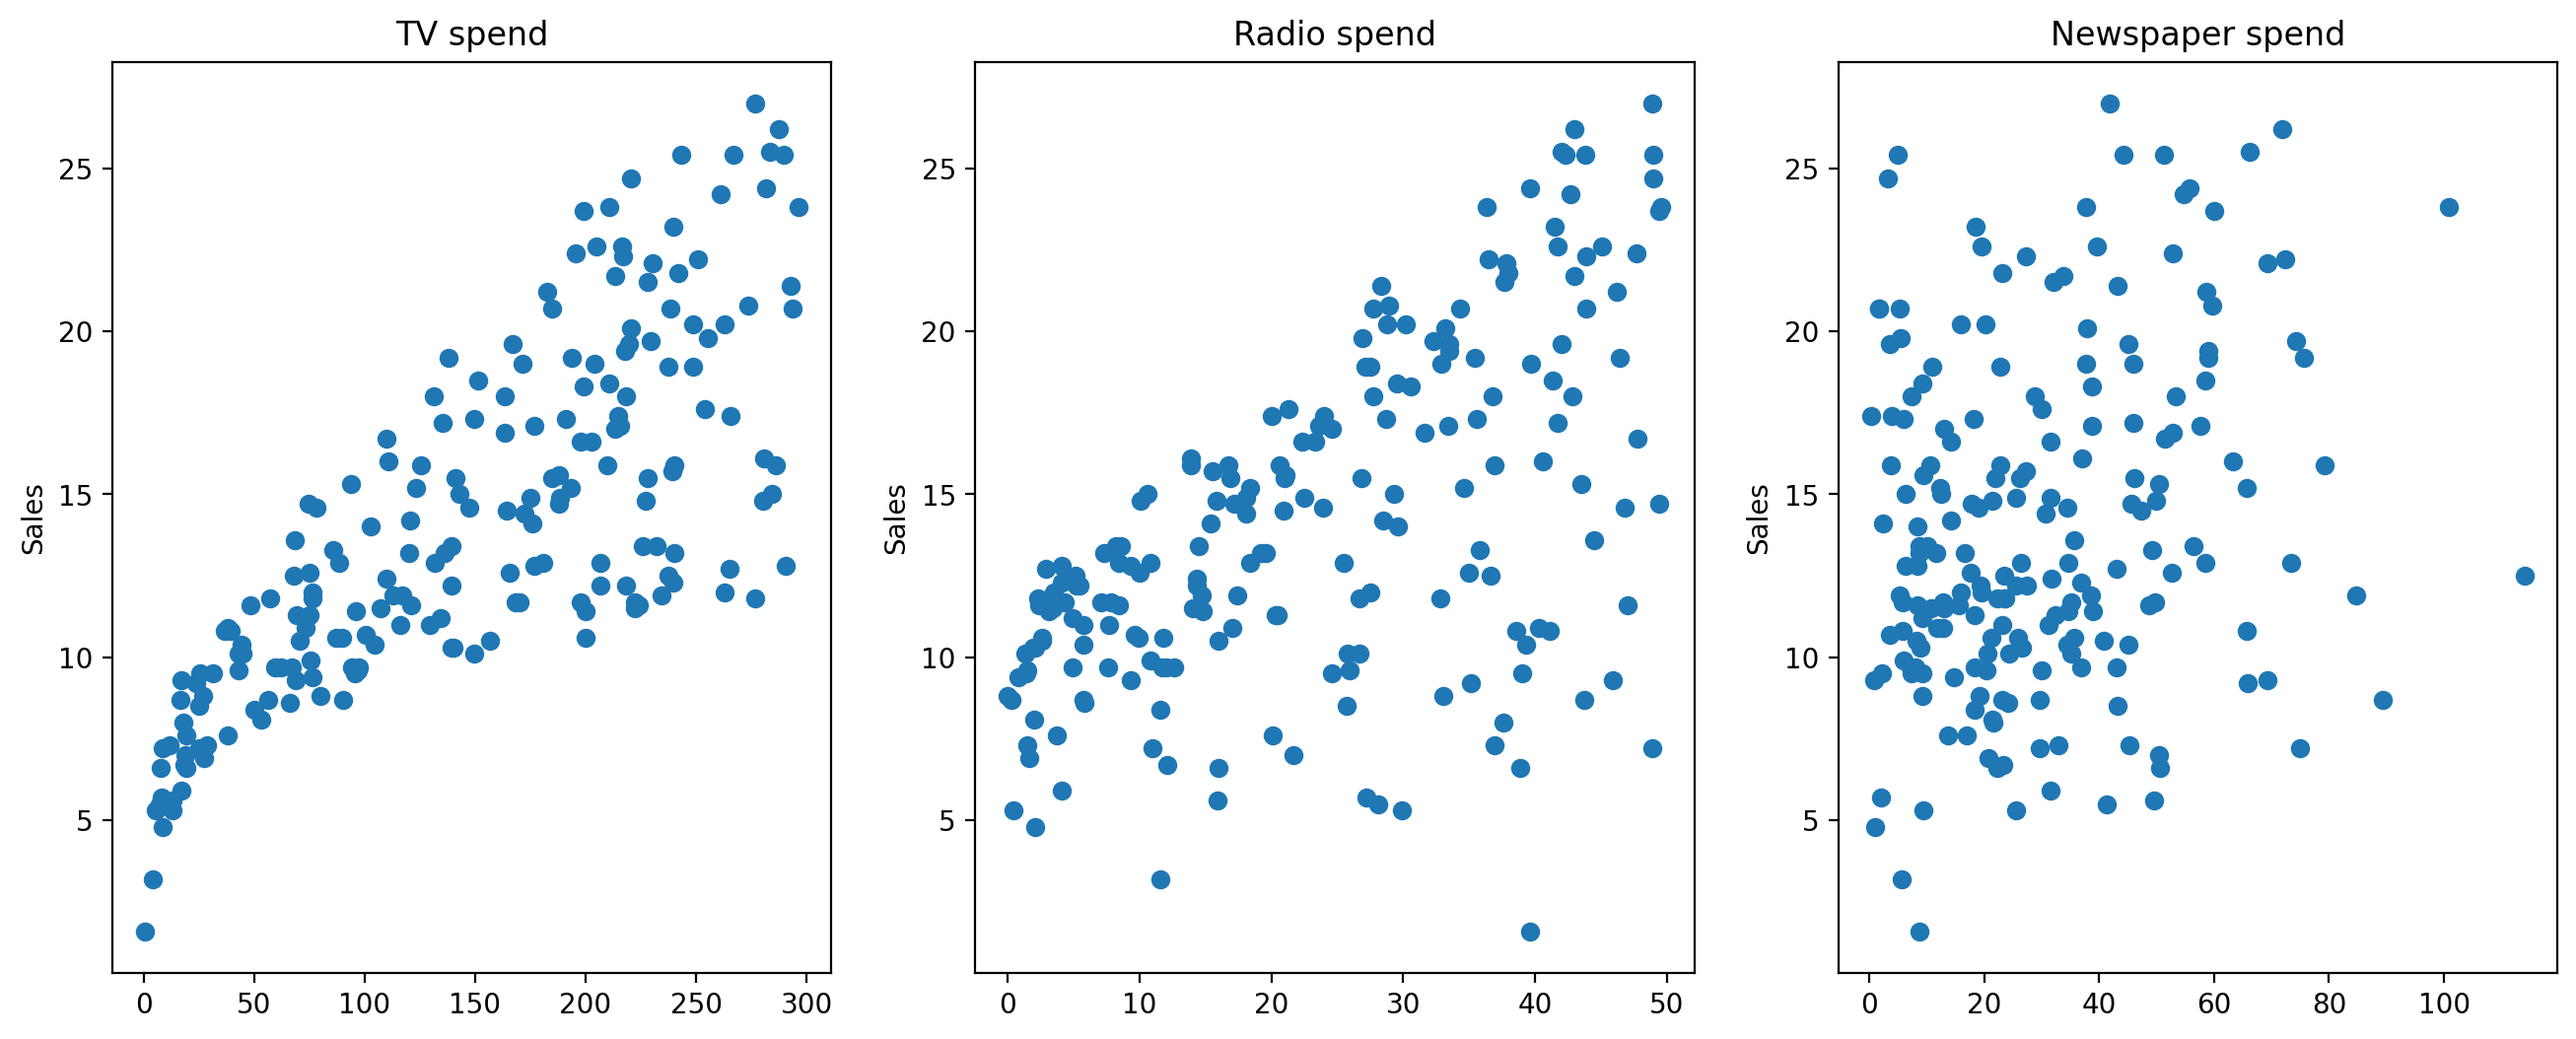

In [12]:
fig,axes = plt.subplots(nrows = 1,ncols = 3,figsize = (16,6),dpi = 200)
axes[0].plot(df["TV"],df["sales"],'o')
axes[0].set_ylabel('Sales')
axes[0].set_title("TV spend")

axes[1].plot(df["radio"],df["sales"],'o')
axes[1].set_ylabel('Sales')
axes[1].set_title("Radio spend")

axes[2].plot(df["newspaper"],df["sales"],'o')
axes[2].set_ylabel('Sales')
axes[2].set_title("Newspaper spend")

In [13]:
X = df.drop('sales',axis = 1) ##Feature model

In [14]:
y = df['sales'] 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
len(df),X_train.shape

(200, (140, 3))

In [21]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train,y_train)

LinearRegression()

In [26]:
test_predictions = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
df['sales'].mean()

14.0225

In [29]:
#MAE
mean_absolute_error(y_test, test_predictions)

1.5116692224549086

In [31]:
#RMSE
np.sqrt(mean_squared_error(y_test,test_predictions))

1.9485372043446378

In [32]:
test_residuals = y_test - test_predictions

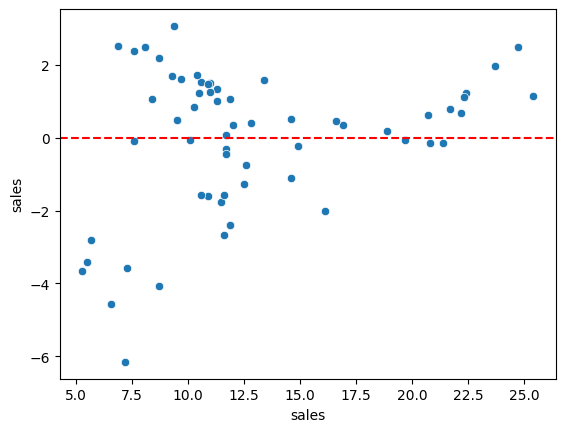

In [34]:
from turtle import color


sns.scatterplot(x=y_test, y = test_residuals)
plt.axhline(y=0,color= 'red', ls = '--')

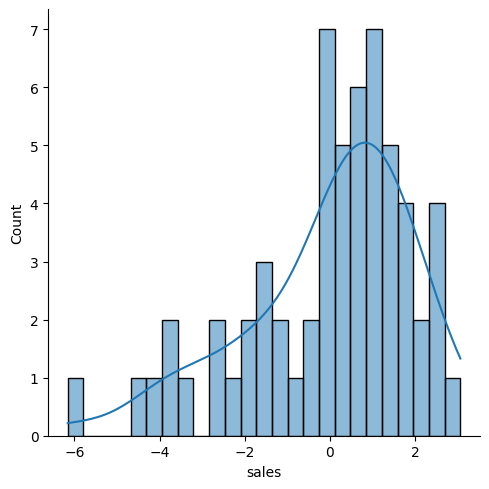

In [36]:
sns.displot(test_residuals,bins=25,kde=True)

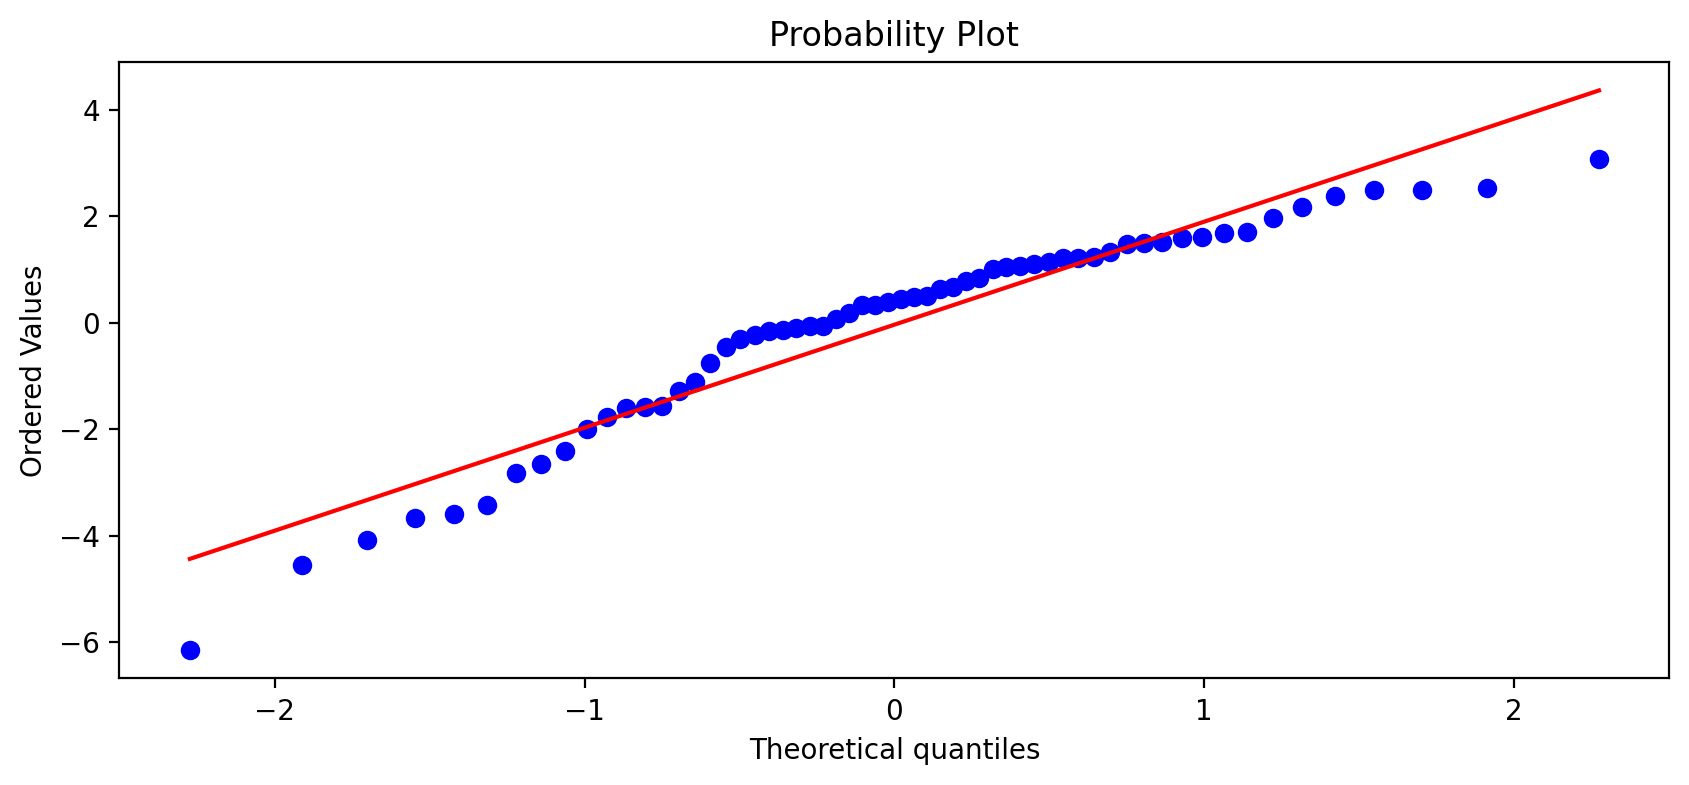

In [39]:
#Create a figure and axis to plot in 
fig,ax = plt.subplots(figsize = (10,4),dpi=200)
_ = sp.stats.probplot(test_residuals,plot = ax)
# The ed line is what a normal distribution should look like
# If the blue points are far from the red line then there is a problem with the dataset

## Deploying a model

In [40]:
final_model = LinearRegression()

In [41]:
final_model.fit(X,y)

LinearRegression()

In [43]:
final_model.coef_ ## the beta coeff of the columns

array([ 0.04576465,  0.18853002, -0.00103749])

In [44]:
## THe newpaper spend is almost 0 so the machine says dont consider that coefficient

In [45]:
y_hat = final_model.predict(X)

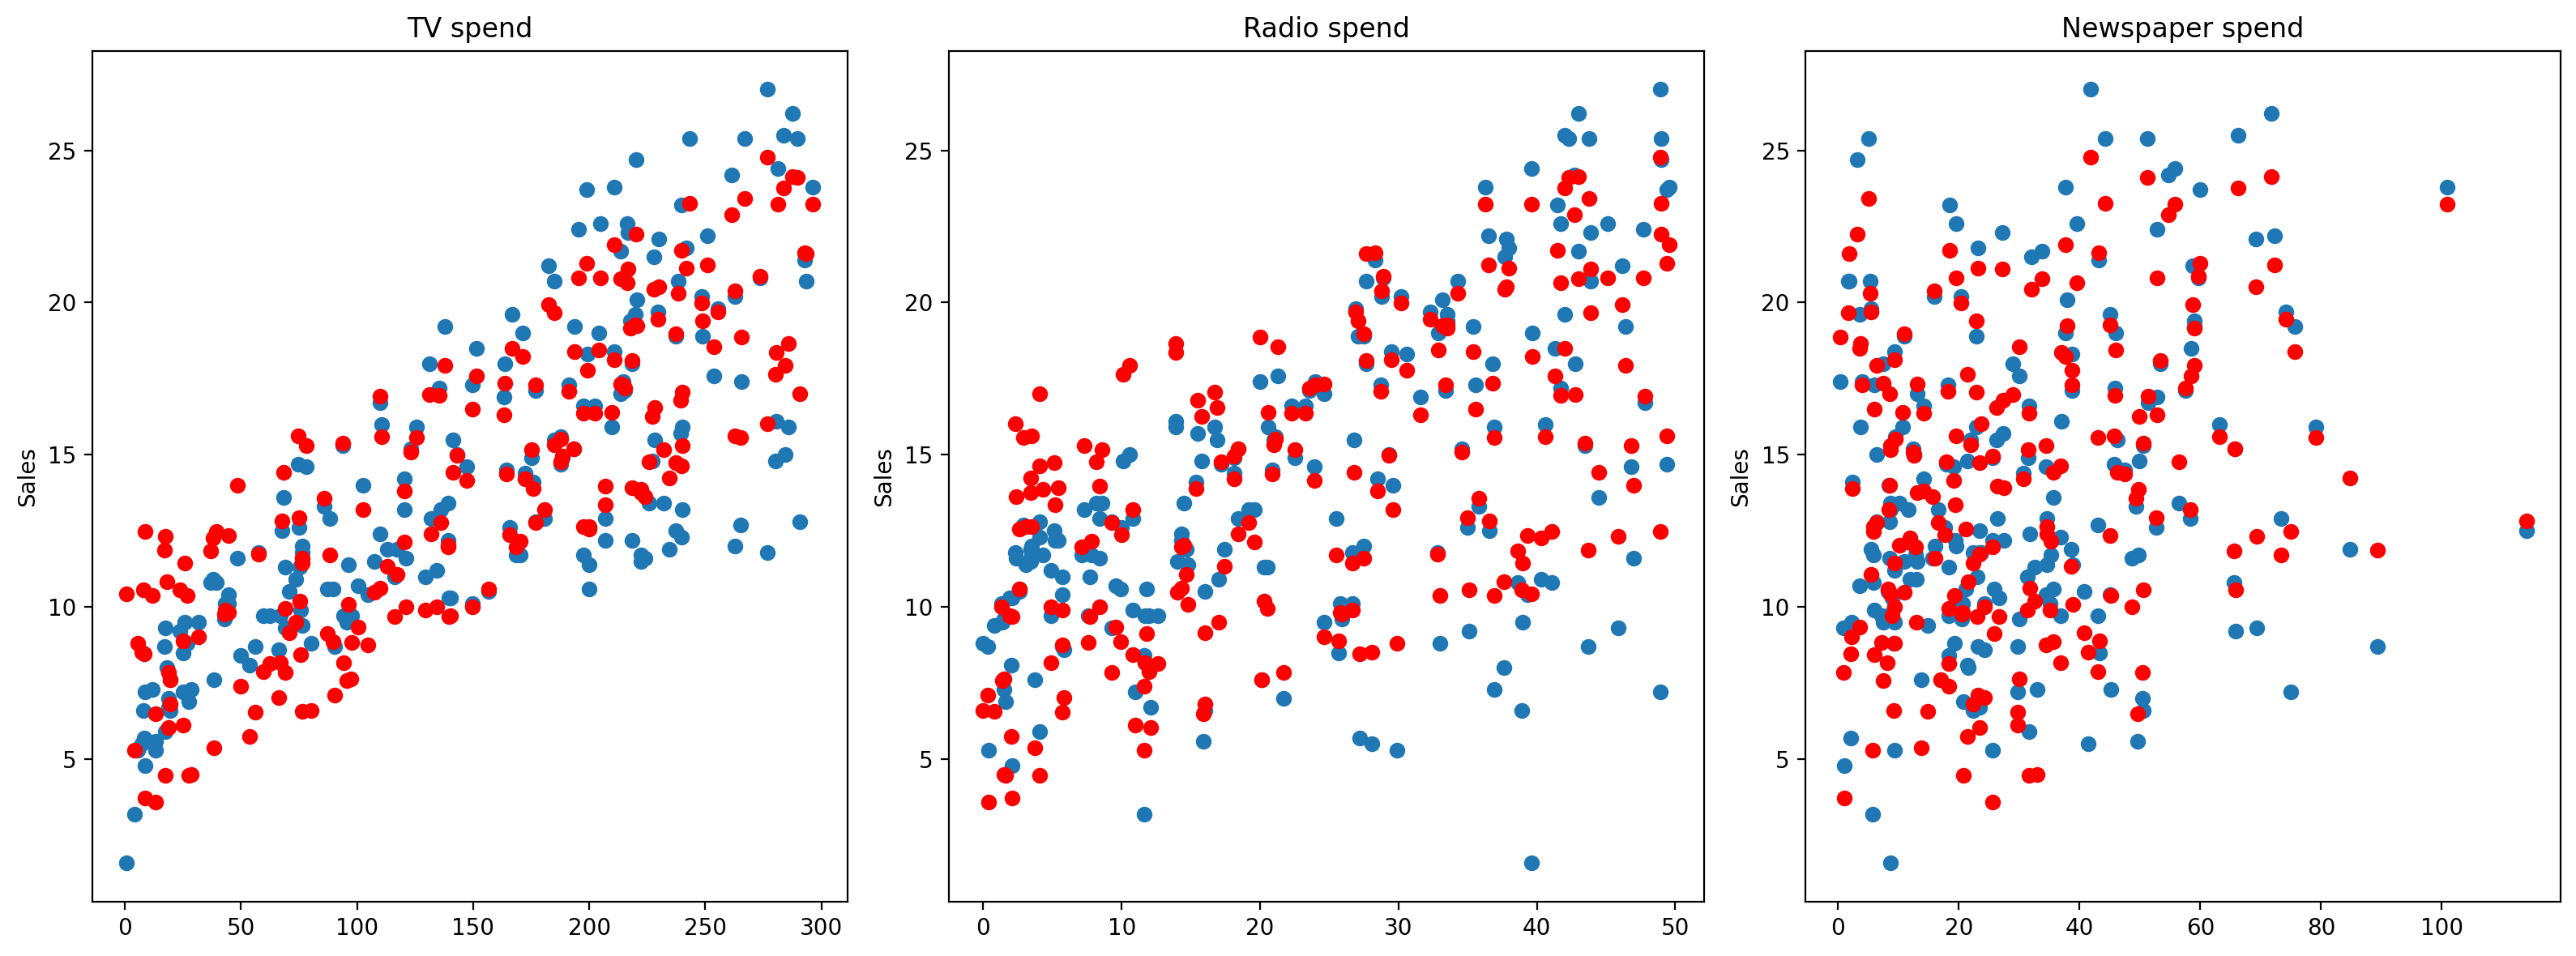

In [47]:
fig,axes = plt.subplots(nrows = 1,ncols = 3,figsize = (16,6),dpi = 200)
axes[0].plot(df["TV"],df["sales"],'o')
axes[0].plot(df["TV"],y_hat,'o',color = 'red')
axes[0].set_ylabel('Sales')
axes[0].set_title("TV spend")

axes[1].plot(df["radio"],df["sales"],'o')
axes[1].plot(df["radio"],y_hat,'o', color = 'red')
axes[1].set_ylabel('Sales')
axes[1].set_title("Radio spend")

axes[2].plot(df["newspaper"],df["sales"],'o')
axes[2].plot(df["newspaper"],y_hat,'o',color = 'red')
axes[2].set_ylabel('Sales')
axes[2].set_title("Newspaper spend")

plt.tight_layout()

## Saving a model

In [48]:
from joblib import dump,load

In [49]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [50]:
loaded_model = load('final_sales_model.joblib')

In [51]:
loaded_model

LinearRegression()

In [52]:
#lets say we want to predict from our values lets say tv =200 radio = 40 newspaper =1
new_values = [[200,50,1]]

In [53]:
loaded_model.predict(new_values)

/Users/kathanbhavsar/Desktop/anaconda3/envs/kathan/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([21.51728181])